In [8]:
import os
import pandas as pd
import numpy as np

In [ ]:
os.chdir('insert/your/directory/here')
# Load your dataset

df = pd.read_csv('dataset.csv', delimiter=',', encoding='latin1')

In [10]:
df.describe()

,ID,Age,SPPB - Frailty,SPPB Scores,Tandem - Balance,Aerobic Fitness,4m Gait Time,4m Gait Speed,LLP - Disability,Dementia
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,30.000000,76.542373,0.271186,10.305085,0.271186,158.322034,3.298305,1.398658,0.355932,0.389831
std,17.175564,8.492029,0.448388,2.387137,0.448388,68.471097,1.437010,0.455081,0.482905,0.491898
min,1.000000,65.000000,0.000000,4.000000,0.000000,20.000000,1.800000,0.571429,0.000000,0.000000
25%,15.500000,70.000000,0.000000,9.000000,0.000000,90.000000,2.350000,0.952381,0.000000,0.000000
50%,30.000000,73.000000,0.000000,12.000000,0.000000,182.000000,2.500000,1.600000,0.000000,0.000000
75%,44.500000,83.000000,1.000000,12.000000,1.000000,217.500000,4.200000,1.702899,1.000000,1.000000
max,59.000000,97.000000,1.000000,12.000000,1.000000,255.000000,7.000000,2.222222,1.000000,1.000000


In [11]:
df.isnull().any()

ID                  False
Age                 False
SPPB - Frailty      False
SPPB Scores         False
Tandem - Balance    False
Aerobic Fitness     False
4m Gait Time        False
4m Gait Speed       False
LLP - Disability    False
Dementia            False
dtype: bool

In [12]:
print(df.dtypes)

ID                    int64
Age                   int64
SPPB - Frailty        int64
SPPB Scores           int64
Tandem - Balance      int64
Aerobic Fitness       int64
4m Gait Time        float64
4m Gait Speed       float64
LLP - Disability      int64
Dementia              int64
dtype: object


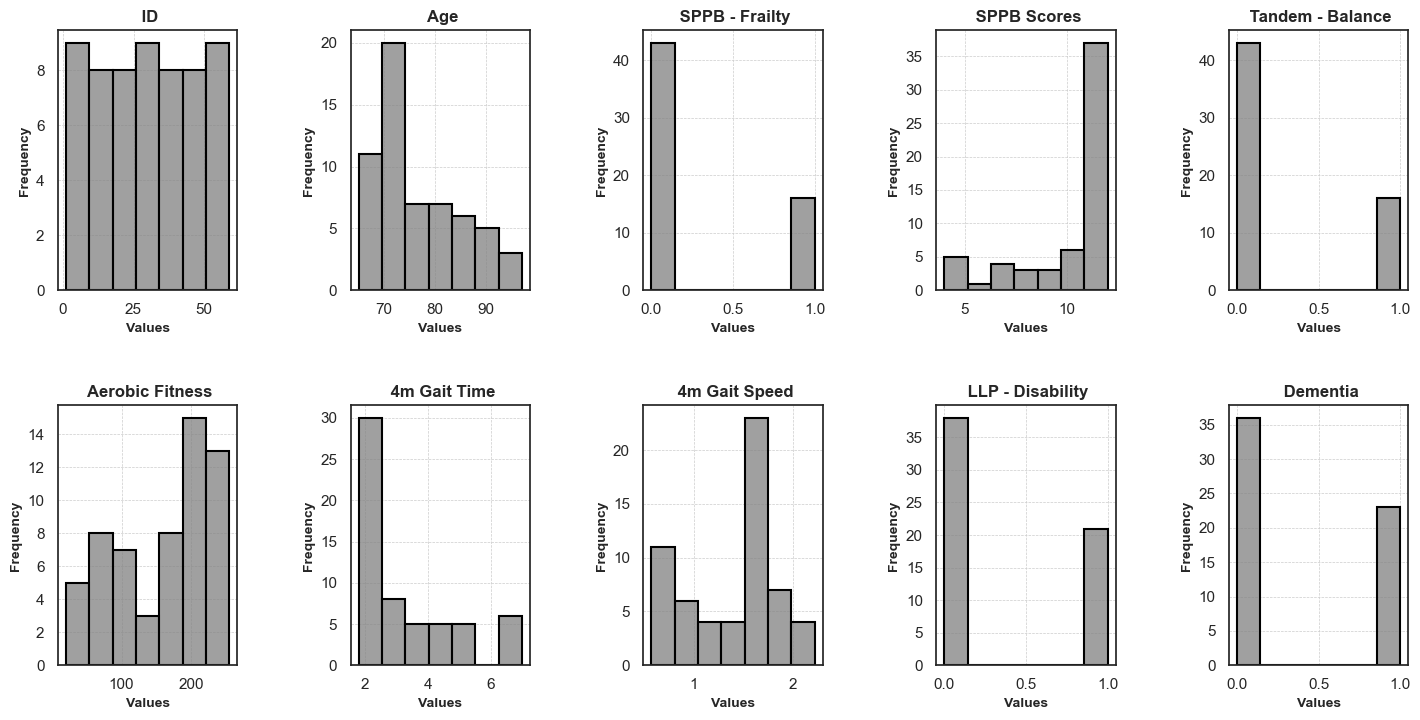

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the dataset distribution

# Set up the figure and axes for the panel of histograms
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))

# Flatten the axes array to iterate over each feature
axes = axes.flatten()

# Iterate over each feature and plot a histogram
for i, col in enumerate(df.columns[:30]):  # Adjusted to iterate over the first 26 columns only
    sns.histplot(df[col], ax=axes[i], kde=False, color='gray', edgecolor='black', linewidth=1.5)
    axes[i].set_title(f' {col}', fontsize=12, weight='bold')  # Set title with adjusted font size and weight
    axes[i].set_xlabel('Values', fontsize=10, weight='bold')  # Adjust font size and weight for x-axis label
    axes[i].set_ylabel('Frequency', fontsize=10, weight='bold')  # Adjust font size and weight for y-axis label

    # Customize grid lines
    axes[i].grid(True, linestyle='--', linewidth=0.5)

# Remove empty subplot if there are more than 26 columns
if len(df.columns) > 26:
    axes[-1].axis('off')  # Turn off the empty subplot

# Adjust layout and add padding between subplots
plt.tight_layout(pad=3.0)

# Display the plot
plt.show()

In [14]:
import pandas as pd

# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

                        ID       Age  SPPB - Frailty  SPPB Scores  \
ID                1.000000 -0.678636       -0.694014     0.716141   
Age              -0.678636  1.000000        0.630850    -0.645341   
SPPB - Frailty   -0.694014  0.630850        1.000000    -0.900135   
SPPB Scores       0.716141 -0.645341       -0.900135     1.000000   
Tandem - Balance -0.664911  0.576514        0.742733    -0.803487   
Aerobic Fitness   0.813858 -0.702286       -0.790227     0.822271   
4m Gait Time     -0.751087  0.676698        0.883749    -0.901537   
4m Gait Speed     0.751693 -0.685292       -0.847768     0.875785   
LLP - Disability -0.746267  0.708897        0.820555    -0.828698   
Dementia         -0.844863  0.732733        0.763156    -0.837189   

                  Tandem - Balance  Aerobic Fitness  4m Gait Time  \
ID                       -0.664911         0.813858     -0.751087   
Age                       0.576514        -0.702286      0.676698   
SPPB - Frailty            0.74273

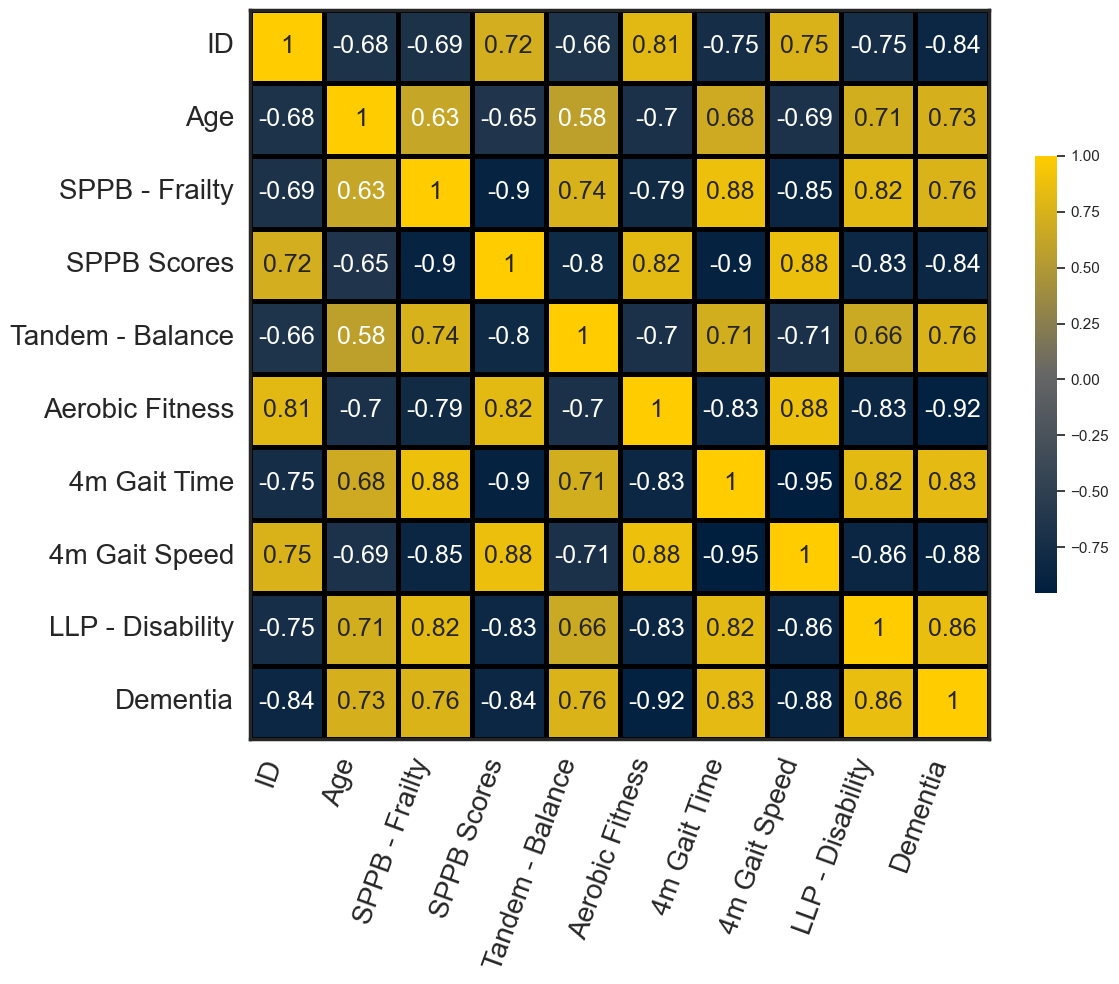

In [15]:
# Plotting the correlation

# Assuming corr_matrix is already defined
plt.figure(figsize=(12, 10))

# Set the aesthetic style of the plots
sns.set(style='white', context='notebook')

# Define a custom color palette with darker blue and stronger yellow
custom_cmap = sns.color_palette(["#001f3f", "#666666", "#ffcc00"])  # Darker blue, grey, stronger yellow

# Create the heatmap with the custom color scale
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    annot_kws={'fontsize': 18},  # Set annotation font size
    cmap=sns.blend_palette(custom_cmap, as_cmap=True),
    linecolor='black',
    linewidths=2.5,
    cbar_kws={'shrink': .6}
)

# Customize the appearance to mimic GraphPad Prism
heatmap.set_title('', fontsize=20)
heatmap.figure.axes[-1].yaxis.label.set_size(20)  # Colorbar label size

# Improve the spines quality
for _, spine in heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2.5)

# Customize the tick labels
plt.xticks(fontsize=20, rotation=70, ha='right')
plt.yticks(fontsize=20, rotation=0)

# Add external ticks
heatmap.tick_params(axis='both', which='both', direction='out', length=8, width=3)

# Adjust x-axis and y-axis limits to move labels closer to edges
plt.xlim(0, len(corr_matrix.columns))  # Adjust based on the number of variables
plt.ylim(len(corr_matrix.columns), 0)  # Adjust based on the number of variables

# Adjust layout to prevent cutting off elements
plt.tight_layout()

# Save the heatmap with adjusted bounding box
plt.savefig('heatmap_high_definition.png', dpi=800, bbox_inches='tight')

# Display the heatmap
plt.show()


In [16]:
# Separate features and target
X = df.drop('Dementia',axis=1)
y = df['Dementia']

In [12]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

# Featuring selection with SMOTE method with XGBClassifier

# Assuming X and y are your features and labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid,
                                   n_iter=50, scoring='f1_weighted', cv=5, random_state=0, n_jobs=-1)
random_search.fit(X_train_res, y_train_res)

# Get the best estimator
best_xgb = random_search.best_estimator_

# Predict the labels of the test set
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Get feature importances
importances = best_xgb.feature_importances_

# Extract feature names from DataFrame columns
feature_names = X.columns

# Combine feature names with their importance scores
feature_importance = list(zip(feature_names, importances))

# Sort features by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print the feature ranking with names
print("Feature ranking (XGBoost):")
for i, (feature, importance) in enumerate(feature_importance):
    percentage_importance = importance * 100
    print(f"{i + 1}. {feature} ({percentage_importance:.2f})")

# Perform Cross-Validation with ROC AUC calculation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize lists to store metrics
cv_scores_accuracy = []
cv_scores_precision = []
cv_scores_recall = []
cv_scores_f1 = []
cv_scores_roc_auc = []

# Iterate through each fold
for train_idx, val_idx in cv.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Apply SMOTE to the training fold
    X_train_fold_res, y_train_fold_res = smote.fit_resample(X_train_fold, y_train_fold)

    # Fit the model on the training fold
    best_xgb.fit(X_train_fold_res, y_train_fold_res)

    # Predict probabilities and labels on the validation fold
    y_val_pred_proba = best_xgb.predict_proba(X_val_fold)[:, 1]
    y_val_pred = best_xgb.predict(X_val_fold)

    # Calculate evaluation metrics
    cv_scores_accuracy.append(accuracy_score(y_val_fold, y_val_pred))
    cv_scores_precision.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    cv_scores_recall.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    cv_scores_f1.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
    cv_scores_roc_auc.append(roc_auc_score(y_val_fold, y_val_pred_proba))

# Print the cross-validation scores
print("\nCross-Validation Scores:")
print(f"Accuracy: {np.mean(cv_scores_accuracy):.2f} +/- {np.std(cv_scores_accuracy):.2f}")
print(f"Precision: {np.mean(cv_scores_precision):.2f} +/- {np.std(cv_scores_precision):.2f}")
print(f"Recall: {np.mean(cv_scores_recall):.2f} +/- {np.std(cv_scores_recall):.2f}")
print(f"F1 Score: {np.mean(cv_scores_f1):.2f} +/- {np.std(cv_scores_f1):.2f}")
print(f"ROC AUC: {np.mean(cv_scores_roc_auc):.2f} +/- {np.std(cv_scores_roc_auc):.2f}")

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics on the test set
print("\nModel Evaluation (XGBoost on Test Set):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print detailed classification report on the test set
print("\nClassification Report (XGBoost on Test Set):")
print(classification_report(y_test, y_pred))

# Print confusion matrix on the test set
print("\nConfusion Matrix (XGBoost on Test Set):")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate ROC AUC for the test set
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC: {roc_auc:.2f}")


Feature ranking (XGBoost):
1. ID (60.55)
2. SPPB Scores (39.45)
3. Age (0.00)
4. SPPB - Frailty (0.00)
5. Tandem - Balance (0.00)
6. Aerobic Fitness (0.00)
7. 4m Gait Time (0.00)
8. 4m Gait Speed (0.00)
9. LLP - Disability (0.00)

Cross-Validation Scores:
Accuracy: 0.98 +/- 0.03
Precision: 0.99 +/- 0.03
Recall: 0.98 +/- 0.03
F1 Score: 0.98 +/- 0.03
ROC AUC: 1.00 +/- 0.00

Model Evaluation (XGBoost on Test Set):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report (XGBoost on Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Confusion Matrix (XGBoost on Test Set):
[[12  0]
 [ 0  6]]

ROC AUC: 1.00


In [14]:
# Featuring selection with SMOTE method with AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the AdaBoost classifier
ada_classifier = AdaBoostClassifier(random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0, 2.0]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=ada_classifier, param_distributions=param_grid,
                                   n_iter=50, scoring='f1_weighted', cv=5, random_state=0, n_jobs=-1)
random_search.fit(X_train_res, y_train_res)

# Get the best estimator
best_ada = random_search.best_estimator_

# Predict the labels of the test set
y_pred = best_ada.predict(X_test)

# Get feature importances (AdaBoost doesn't have direct feature importances, so we skip this part)

# Perform Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Cross-validation scores
cv_scores_accuracy = cross_val_score(best_ada, X, y, cv=cv, scoring='accuracy')
cv_scores_precision = cross_val_score(best_ada, X, y, cv=cv, scoring='precision_weighted')
cv_scores_recall = cross_val_score(best_ada, X, y, cv=cv, scoring='recall_weighted')
cv_scores_f1 = cross_val_score(best_ada, X, y, cv=cv, scoring='f1_weighted')

# Print the cross-validation scores
print("\nCross-Validation Scores:")
print(f"Accuracy: {np.mean(cv_scores_accuracy):.2f} +/- {np.std(cv_scores_accuracy):.2f}")
print(f"Precision: {np.mean(cv_scores_precision):.2f} +/- {np.std(cv_scores_precision):.2f}")
print(f"Recall: {np.mean(cv_scores_recall):.2f} +/- {np.std(cv_scores_recall):.2f}")
print(f"F1 Score: {np.mean(cv_scores_f1):.2f} +/- {np.std(cv_scores_f1):.2f}")

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics on the test set
print("\nModel Evaluation (AdaBoost on Test Set):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print detailed classification report on the test set
print("\nClassification Report (AdaBoost on Test Set):")
print(classification_report(y_test, y_pred))

# Print confusion matrix on the test set
print("\nConfusion Matrix (AdaBoost on Test Set):")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

c:\Users\Lenovo\.ms-ad\anoconda\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Cross-Validation Scores:
Accuracy: 0.97 +/- 0.04
Precision: 0.97 +/- 0.04
Recall: 0.97 +/- 0.04
F1 Score: 0.97 +/- 0.04

Model Evaluation (AdaBoost on Test Set):
Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94

Classification Report (AdaBoost on Test Set):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.83      0.91         6

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18


Confusion Matrix (AdaBoost on Test Set):
[[12  0]
 [ 1  5]]


In [15]:
# Featuring selection with SMOTE method with GradientBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_grid,
                                   n_iter=50, scoring='f1_weighted', cv=5, random_state=0, n_jobs=-1)
random_search.fit(X_train_res, y_train_res)

# Get the best estimator
best_gb = random_search.best_estimator_

# Predict the labels of the test set
y_pred = best_gb.predict(X_test)

# Get feature importances
importances = best_gb.feature_importances_

# Extract feature names from DataFrame columns
feature_names = X.columns

# Combine feature names with their importance scores
feature_importance = list(zip(feature_names, importances))

# Sort features by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print the feature ranking with names
print("Feature ranking (Gradient Boosting):")
for i, (feature, importance) in enumerate(feature_importance):
    percentage_importance = importance * 100
    print(f"{i + 1}. {feature} ({percentage_importance:.2f})")

# Perform Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Cross-validation scores
cv_scores_accuracy = cross_val_score(best_gb, X, y, cv=cv, scoring='accuracy')
cv_scores_precision = cross_val_score(best_gb, X, y, cv=cv, scoring='precision_weighted')
cv_scores_recall = cross_val_score(best_gb, X, y, cv=cv, scoring='recall_weighted')
cv_scores_f1 = cross_val_score(best_gb, X, y, cv=cv, scoring='f1_weighted')

# Print the cross-validation scores
print("\nCross-Validation Scores:")
print(f"Accuracy: {np.mean(cv_scores_accuracy):.2f} +/- {np.std(cv_scores_accuracy):.2f}")
print(f"Precision: {np.mean(cv_scores_precision):.2f} +/- {np.std(cv_scores_precision):.2f}")
print(f"Recall: {np.mean(cv_scores_recall):.2f} +/- {np.std(cv_scores_recall):.2f}")
print(f"F1 Score: {np.mean(cv_scores_f1):.2f} +/- {np.std(cv_scores_f1):.2f}")

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics on the test set
print("\nModel Evaluation (Gradient Boosting on Test Set):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print detailed classification report on the test set
print("\nClassification Report (Gradient Boosting on Test Set):")
print(classification_report(y_test, y_pred))

# Print confusion matrix on the test set
print("\nConfusion Matrix (Gradient Boosting on Test Set):")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



Feature ranking (Gradient Boosting):
1. SPPB Scores (36.89)
2. ID (32.42)
3. Aerobic Fitness (19.67)
4. 4m Gait Time (10.51)
5. 4m Gait Speed (0.50)
6. Age (0.01)
7. LLP - Disability (0.00)
8. SPPB - Frailty (0.00)
9. Tandem - Balance (0.00)

Cross-Validation Scores:
Accuracy: 0.98 +/- 0.03
Precision: 0.99 +/- 0.03
Recall: 0.98 +/- 0.03
F1 Score: 0.98 +/- 0.03

Model Evaluation (Gradient Boosting on Test Set):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report (Gradient Boosting on Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Confusion Matrix (Gradient Boosting on Test Set):
[[12  0]
 [ 0  6]]


In [16]:
# Featuring selection with SMOTE method with Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,
                                   n_iter=50, scoring='f1_weighted', cv=5, random_state=0, n_jobs=-1)
random_search.fit(X_train_res, y_train_res)

# Get the best estimator
best_rf = random_search.best_estimator_

# Predict the labels of the test set
y_pred = best_rf.predict(X_test)

# Get feature importances
importances = best_rf.feature_importances_

# Extract feature names from DataFrame columns
feature_names = X.columns

# Combine feature names with their importance scores
feature_importance = list(zip(feature_names, importances))

# Sort features by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print the feature ranking with names
print("Feature ranking (Random Forest):")
for i, (feature, importance) in enumerate(feature_importance):
    percentage_importance = importance * 100
    print(f"{i + 1}. {feature} ({percentage_importance:.2f})")

# Perform Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Cross-validation scores
cv_scores_accuracy = cross_val_score(best_rf, X, y, cv=cv, scoring='accuracy')
cv_scores_precision = cross_val_score(best_rf, X, y, cv=cv, scoring='precision_weighted')
cv_scores_recall = cross_val_score(best_rf, X, y, cv=cv, scoring='recall_weighted')
cv_scores_f1 = cross_val_score(best_rf, X, y, cv=cv, scoring='f1_weighted')

# Print the cross-validation scores
print("\nCross-Validation Scores:")
print(f"Accuracy: {np.mean(cv_scores_accuracy):.2f} +/- {np.std(cv_scores_accuracy):.2f}")
print(f"Precision: {np.mean(cv_scores_precision):.2f} +/- {np.std(cv_scores_precision):.2f}")
print(f"Recall: {np.mean(cv_scores_recall):.2f} +/- {np.std(cv_scores_recall):.2f}")
print(f"F1 Score: {np.mean(cv_scores_f1):.2f} +/- {np.std(cv_scores_f1):.2f}")

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics on the test set
print("\nModel Evaluation (Random Forest on Test Set):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print detailed classification report on the test set
print("\nClassification Report (Random Forest on Test Set):")
print(classification_report(y_test, y_pred))

# Print confusion matrix on the test set
print("\nConfusion Matrix (Random Forest on Test Set):")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Feature ranking (Random Forest):
1. Aerobic Fitness (23.19)
2. SPPB Scores (23.03)
3. 4m Gait Time (18.41)
4. ID (17.82)
5. 4m Gait Speed (15.69)
6. Tandem - Balance (1.82)
7. Age (0.04)
8. SPPB - Frailty (0.00)
9. LLP - Disability (0.00)

Cross-Validation Scores:
Accuracy: 0.98 +/- 0.03
Precision: 0.99 +/- 0.03
Recall: 0.98 +/- 0.03
F1 Score: 0.98 +/- 0.03

Model Evaluation (Random Forest on Test Set):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report (Random Forest on Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Confusion Matrix (Random Forest on Test Set):
[[12  0]
 [ 0  6]]


In [17]:
# Featuring selection with SMOTE method with Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid,
                                   n_iter=50, scoring='f1_weighted', cv=5, random_state=0, n_jobs=-1)
random_search.fit(X_train_res, y_train_res)

# Get the best estimator
best_dt = random_search.best_estimator_

# Predict the labels of the test set
y_pred = best_dt.predict(X_test)

# Get feature importances
importances = best_dt.feature_importances_

# Extract feature names from DataFrame columns
feature_names = X.columns

# Combine feature names with their importance scores
feature_importance = list(zip(feature_names, importances))

# Sort features by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print the feature ranking with names
print("Feature ranking (Decision Tree):")
for i, (feature, importance) in enumerate(feature_importance):
    percentage_importance = importance * 100
    print(f"{i + 1}. {feature} ({percentage_importance:.2f})")

# Perform Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Cross-validation scores
cv_scores_accuracy = cross_val_score(best_dt, X, y, cv=cv, scoring='accuracy')
cv_scores_precision = cross_val_score(best_dt, X, y, cv=cv, scoring='precision_weighted')
cv_scores_recall = cross_val_score(best_dt, X, y, cv=cv, scoring='recall_weighted')
cv_scores_f1 = cross_val_score(best_dt, X, y, cv=cv, scoring='f1_weighted')

# Print the cross-validation scores
print("\nCross-Validation Scores:")
print(f"Accuracy: {np.mean(cv_scores_accuracy):.2f} +/- {np.std(cv_scores_accuracy):.2f}")
print(f"Precision: {np.mean(cv_scores_precision):.2f} +/- {np.std(cv_scores_precision):.2f}")
print(f"Recall: {np.mean(cv_scores_recall):.2f} +/- {np.std(cv_scores_recall):.2f}")
print(f"F1 Score: {np.mean(cv_scores_f1):.2f} +/- {np.std(cv_scores_f1):.2f}")

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics on the test set
print("\nModel Evaluation (Decision Tree on Test Set):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print detailed classification report on the test set
print("\nClassification Report (Decision Tree on Test Set):")
print(classification_report(y_test, y_pred))

# Print confusion matrix on the test set
print("\nConfusion Matrix (Decision Tree on Test Set):")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Feature ranking (Decision Tree):
1. SPPB Scores (100.00)
2. ID (0.00)
3. Age (0.00)
4. SPPB - Frailty (0.00)
5. Tandem - Balance (0.00)
6. Aerobic Fitness (0.00)
7. 4m Gait Time (0.00)
8. 4m Gait Speed (0.00)
9. LLP - Disability (0.00)

Cross-Validation Scores:
Accuracy: 0.97 +/- 0.04
Precision: 0.97 +/- 0.04
Recall: 0.97 +/- 0.04
F1 Score: 0.97 +/- 0.04

Model Evaluation (Decision Tree on Test Set):
Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94

Classification Report (Decision Tree on Test Set):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.83      0.91         6

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18


Confusion Matrix (Decision Tree on Test Set):
[[12  0]
 [ 1  5]]


In [18]:
# Featuring selection with SMOTE method with Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the resampled training data
nb_classifier.fit(X_train_res, y_train_res)

# Predict the labels of the test set
y_pred = nb_classifier.predict(X_test)

# Get class means (theta) for each feature
class_means = nb_classifier.theta_

# Calculate a score based on difference in means
feature_scores = np.abs(class_means[1] - class_means[0])

# Combine feature names with their scores
feature_names = X.columns
feature_scores_with_names = list(zip(feature_names, feature_scores))

# Sort features by score (higher score means more discriminative)
feature_scores_with_names.sort(key=lambda x: x[1], reverse=True)

# Print the feature ranking with names and scores
print("Feature ranking (Naive Bayes):")
for i, (feature, score) in enumerate(feature_scores_with_names):
    print(f"{i + 1}. {feature} ({score:.2f})")

# Evaluate the model using cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores_accuracy = cross_val_score(nb_classifier, X, y, cv=cv, scoring='accuracy')
cv_scores_precision = cross_val_score(nb_classifier, X, y, cv=cv, scoring='precision_weighted')
cv_scores_recall = cross_val_score(nb_classifier, X, y, cv=cv, scoring='recall_weighted')
cv_scores_f1 = cross_val_score(nb_classifier, X, y, cv=cv, scoring='f1_weighted')

# Print the cross-validation scores
print("\nCross-Validation Scores:")
print(f"Accuracy: {np.mean(cv_scores_accuracy):.2f} +/- {np.std(cv_scores_accuracy):.2f}")
print(f"Precision: {np.mean(cv_scores_precision):.2f} +/- {np.std(cv_scores_precision):.2f}")
print(f"Recall: {np.mean(cv_scores_recall):.2f} +/- {np.std(cv_scores_recall):.2f}")
print(f"F1 Score: {np.mean(cv_scores_f1):.2f} +/- {np.std(cv_scores_f1):.2f}")

# Print detailed classification report
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Naive Bayes):")
print(conf_matrix)

Feature ranking (Naive Bayes):
1. Aerobic Fitness (126.92)
2. ID (30.38)
3. Age (14.29)
4. SPPB Scores (4.38)
5. 4m Gait Time (2.37)
6. Tandem - Balance (0.83)
7. 4m Gait Speed (0.79)
8. LLP - Disability (0.75)
9. SPPB - Frailty (0.62)

Cross-Validation Scores:
Accuracy: 0.98 +/- 0.04
Precision: 0.99 +/- 0.03
Recall: 0.98 +/- 0.04
F1 Score: 0.98 +/- 0.04

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Confusion Matrix (Naive Bayes):
[[12  0]
 [ 0  6]]


In [20]:
import pandas as pd

# Assuming your original dataframe is named df
# Example: df = pd.read_csv('your_dataset.csv')

# Step 2: Specify the columns of interest
columns_of_interest = [
'Aerobic Fitness',
'Dementia'
]

# Step 3: Create a new DataFrame with only the columns of interest
df = df[columns_of_interest]

# Print the new dataset to verify
print(df.head())

   Aerobic Fitness  Dementia
0               99         1
1               90         1
2               80         1
3               38         1
4               45         1


In [21]:
# Separate features and target
X = df.drop('Dementia',axis=1)
y = df['Dementia']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [23]:
df.columns

Index(['Aerobic Fitness', 'Dementia'], dtype='object')

In [24]:

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
X = scaler.fit_transform(X)

In [26]:
X,y

(array([[-0.87381754],
        [-1.00638815],
        [-1.15368882],
        [-1.77235164],
        [-1.66924117],
        [-1.63978103],
        [-1.37463982],
        [-0.60867633],
        [-1.44829016],
        [-2.03749285],
        [-1.30098949],
        [-1.66924117],
        [-1.33044962],
        [-1.15368882],
        [-1.33044962],
        [-1.03584828],
        [-0.74124694],
        [-1.00638815],
        [-0.41718546],
        [-1.00638815],
        [-1.24206922],
        [-0.26988479],
        [-0.4908358 ],
        [ 0.95271078],
        [ 0.3193179 ],
        [ 0.83487025],
        [ 0.26039763],
        [ 1.20312192],
        [ 0.34877803],
        [ 0.46661857],
        [ 0.61391924],
        [ 1.20312192],
        [ 0.95271078],
        [ 0.62864931],
        [ 0.5844591 ],
        [ 1.05582125],
        [ 1.42407293],
        [ 0.62864931],
        [ 0.18674729],
        [ 0.77594998],
        [ 0.90852058],
        [ 0.76121991],
        [ 0.95271078],
        [ 1

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
# Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict labels for the test set
nb_y_pred = nb_model.predict(X_test)

# Calculate classification metrics
accuracy_nb = accuracy_score(y_test, nb_y_pred)
recall_nb = recall_score(y_test, nb_y_pred)
precision_nb = precision_score(y_test, nb_y_pred)
f1_nb = f1_score(y_test, nb_y_pred)
roc_auc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])
conf_matrix_nb = confusion_matrix(y_test, nb_y_pred)

# Print metrics
print("Confusion Matrix:")
print(conf_matrix_nb)
print("\nNaive Bayes Classifier Metrics:")
print("Accuracy:", accuracy_nb)
print("Recall:", recall_nb)
print("Precision:", precision_nb)
print("F1-score:", f1_nb)
print("ROC AUC:", roc_auc_nb)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, nb_y_pred))



Confusion Matrix:
[[12  0]
 [ 0  6]]

Naive Bayes Classifier Metrics:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-score: 1.0
ROC AUC: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [32]:
# Support Vector Classifier

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
# Assuming X_train, X_test, y_train, and y_test are defined

# Initialize and train the Support Vector Classifier model
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)
svc_y_pred_proba = svc_model.predict_proba(X_test)[:, 1]

# Calculate classification metrics
accuracy_svc = accuracy_score(y_test, svc_y_pred)
recall_svc = recall_score(y_test, svc_y_pred)
precision_svc = precision_score(y_test, svc_y_pred)
f1_svc = f1_score(y_test, svc_y_pred)
conf_matrix_svc = confusion_matrix(y_test, svc_y_pred)

# Print metrics
print("Confusion Matrix:")
print(conf_matrix_svc)
print("\nSupport Vector Classifier Metrics:")
print("Accuracy:", accuracy_svc)
print("Recall:", recall_svc)
print("Precision:", precision_svc)
print("F1-score:", f1_svc)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, svc_y_pred))

Confusion Matrix:
[[12  0]
 [ 0  6]]

Support Vector Classifier Metrics:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [30]:
# Ada Boost Classifier

from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate AdaBoost Classifier
ada_clf = AdaBoostClassifier(random_state=0)

# Fit the classifier on the training data
ada_clf.fit(X_train, y_train)

# Predictions on the test set
ada_y_pred = ada_clf.predict(X_test)

# Calculate performance metrics
ada_accuracy = accuracy_score(y_test, ada_y_pred)
ada_precision = precision_score(y_test, ada_y_pred, average='weighted')
ada_recall = recall_score(y_test, ada_y_pred, average='weighted')
ada_f1 = f1_score(y_test, ada_y_pred, average='weighted')
conf_matrix_ab = confusion_matrix(y_test, ada_y_pred)

# Compute ROC curve and ROC area under the curve
fpr, tpr, _ = roc_curve(y_test, ada_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Print performance metrics
print("AdaBoost Classifier Performance:")
print("Accuracy:", ada_accuracy)
print("Precision:", ada_precision)
print("Recall:", ada_recall)
print("F1 Score:", ada_f1)
print("\nClassification Report:")
print(classification_report(y_test, ada_y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix_ab)

# Print ROC AUC score
print("\nROC AUC Score:", roc_auc)


AdaBoost Classifier Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Confusion Matrix:
[[12  0]
 [ 0  6]]

ROC AUC Score: 1.0


In [31]:
# XGboost

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

# Assuming X_train, X_test, y_train, and y_test are defined

# Initialize and train the XGBoost Classifier model
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
xgb_y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Calculate classification metrics
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
conf_matrix_xgb = confusion_matrix(y_test, xgb_y_pred)

# Calculate ROC curve and ROC AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_y_pred_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Print metrics
print("\nXGBoost Classifier Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)
print("Confusion Matrix:\n", conf_matrix_xgb)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, xgb_y_pred))

# Print ROC AUC
print("\nROC AUC:", roc_auc_xgb)


XGBoost Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[12  0]
 [ 0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


ROC AUC: 1.0


In [ ]:
# LightGBM Classifier

from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Assuming X and y are your features and target respectively
# Example:
# X = pd.DataFrame(...)  # Your feature data
# y = pd.Series(...)     # Your target data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train LightGBM Classifier
lgbm = LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = lgbm.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("\nModel Evaluation (LightGBM):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Print detailed classification report
print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix (LightGBM):")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[LightGBM] [Info] Number of positive: 17, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 41, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.414634 -> initscore=-0.344840
[LightGBM] [Info] Start training from score -0.344840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
# CatBoost Classifier  

import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming X and y are your features and target respectively
# Example:
# X = pd.DataFrame(...)  # Your feature data
# y = pd.Series(...)     # Your target data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train CatBoost Classifier
catboost = CatBoostClassifier(random_state=0, silent=True)
catboost.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = catboost.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("\nModel Evaluation (CatBoost):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Print detailed classification report
print("\nClassification Report (CatBoost):")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix (CatBoost):")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)




Model Evaluation (CatBoost):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00

Classification Report (CatBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Confusion Matrix (CatBoost):
[[12  0]
 [ 0  6]]


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Assuming X and y are your features and target respectively
# Example:
# X = pd.DataFrame(...)  # Your feature data
# y = pd.Series(...)     # Your target data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("\nModel Evaluation (KNN):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Print detailed classification report
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix (KNN):")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Model Evaluation (KNN):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00

Classification Report (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Confusion Matrix (KNN):
[[12  0]
 [ 0  6]]


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Assuming X and y are your features and target respectively
# Example:
# X = pd.DataFrame(...)  # Your feature data
# y = pd.Series(...)     # Your target data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train Logistic Regression
logreg = LogisticRegression(random_state=0, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("\nModel Evaluation (Logistic Regression):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Print detailed classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix (Logistic Regression):")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



Model Evaluation (Logistic Regression):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


Confusion Matrix (Logistic Regression):
[[12  0]
 [ 0  6]]


In [ ]:
# Cross validation of the models
logreg
knn
nb_model
rf_classifier
svc_model
dt_classifier
gb_classifier
ada_clf
xgb_clf
lgbm
catboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score

# Configurar K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Realizar a validação cruzada
scores = cross_val_score(xgb_clf, X, y, cv=kf, scoring='accuracy')

# Exibir os resultados
print(f"Scores for each fold: {scores}")
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

Scores for each fold: [0.91666667 1.         1.         0.91666667 1.        ]
Mean accuracy: 0.9666666666666666
Standard deviation: 0.04082482904638632
